<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Tackling an NLP Problem with Naive Bayes

----

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

**Instructor's note: While I completely agree with the idea expressed below, we will be discussing Naive Bayes in class**

In this lab, we are going to apply a **new** modeling technique to natural language processing data.

> "But how can we apply a modeling technique we haven't learned?!"

The DSI program is great - but we can't teach you *everything* about data science in 12 weeks! This lab is designed to help you start learning something new without it being taught in a formal lesson. 

- Later in the cohort (like for your capstone!), you'll be exploring models, libraries, and resources that you haven't been explicitly taught.
- After the program, you'll want to continue developing your skills. Being comfortable with documentation and being confident in your ability to read something new and decide whether or not it is an appropriate method for the problem you're trying to solve is **incredibly** valuable.

### Step 1: Define the problem.

Many organizations have a substantial interest in classifying users of their product into groups. Some examples:
- A company that serves as a marketplace may want to predict who is likely to purchase a certain type of product on their platform, like books, cars, or food.
- An application developer may want to identify which individuals are willing to pay money for "bonus features" or to upgrade their app.
- A social media organization may want to identify who generates the highest rate of content that later goes "viral."

### Summary
In this lab, you're an engineer for Facebook. In recent years, the organization Cambridge Analytica gained worldwide notoriety for its use of Facebook data in an attempt to sway electoral outcomes.

Cambridge Analytica, an organization staffed with lots of Ph.D. researchers, used the Big5 personality groupings (also called OCEAN) to group people into one of 32 different groups.
- The five qualities measured by this personality assessment are:
    - **O**penness
    - **C**onscientiousness
    - **E**xtroversion
    - **A**greeableness
    - **N**euroticism
- Each person could be classified as "Yes" or "No" for each of the five qualities.
- This makes for 32 different potential combinations of qualities. ($2^5 = 32$)
- You don't have to check it out, but if you want to learn more about this personality assessment, head to [**the Wikipedia page**](https://en.wikipedia.org/wiki/Big_Five_personality_traits).
- There's also [**a short (3-4 pages) academic paper describing part of this approach**](./celli-al_wcpr13.pdf).

Cambridge Analytica's methodology was, roughly, the following:
- Gather a large amount of data from Facebook.
- Use this data to predict an individual's Big5 personality "grouping."
- Design political advertisements that would be particularly effective to that particular "grouping." (For example, are certain advertisements particularly effective toward people with specific personality traits?)

You want to know the **real-world problem**: "Is what Cambridge Analytica attempted to do actually possible, or is it junk science?"

However, we'll solve the related **data science problem**: "Are one's Facebook statuses predictive of whether or not one is agreeable?"
> Note: If Facebook statuses aren't predictive of one being agreeable (one of the OCEAN qualities), then Cambridge Analytica's approach won't work very well!

### Step 2: Obtain the data.

Obviously, there are plenty of opportunities to discuss the ethics surrounding this particular issue... so let's do that.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline
import seaborn as sns

In [2]:
data = pd.read_csv('./mypersonality_final.csv', encoding = 'ISO-8859-1')

In [3]:
data.head()

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she ca...,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
2,b7b7764cfa1c523e4e93ab2a79a946c4,is sore and wants the knot of muscles at the b...,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/22/09 04:48 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/20/09 02:31 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1


**1. What is the difference between anonymity and confidentiality? All else held equal, which tends to keep people safer?**

Anonymity is when the outsiders never know who you are, your identity never shown up. But the confidentiality is whne the collecter are collected or know your information but keep it as a secret, did not show it to anyone. The safest choice will be the anonymity. 

**2. Suppose that the "unique identifier" in the above data, the `#AUTHID`, is a randomly generated key so that it can never be connected back to the original poster. Have we guaranteed anonymity here? Why or why not?**

I think this is called confidentiality as the information are collected with the true account name and then hidding it from the thrid party, if it called anonymity no one even the officer will never the real account name.

**3. As an engineer for Facebook, you recognize that user data will be used by Facebook and by other organizations - that won't change. However, what are at least three recommendations you would bring to your manager to improve how data is used and shared? Be as specific as you can.**

1. I would ask the Facebook to have more advance and secure anonymity when it is have to be extracted by any people
2. May be would ask the person who going to extract and use the data to get approve by Facebook first before allowing them to access the information
3. Asking the permission from the Facebook's users that their data is going to be used by what purpose

### Step 3: Explore the data.

- Note: For our $X$ variable, we will only use the `STATUS` variable. For our $Y$ variable, we will only use the `cAGR` variable.

**4. Explore the data here.**
> We aren't explicitly asking you to do specific EDA here, but what EDA would you generally do with this data? Do the EDA you usually would, especially if you know what the goal of this analysis is.

You want to know the real-world problem: "Is what Cambridge Analytica attempted to do actually possible, or is it junk science?"

However, we'll solve the related data science problem: "Are one's Facebook statuses predictive of whether or not one is agreeable?"

Note: If Facebook statuses aren't predictive of one being agreeable (one of the OCEAN qualities), then Cambridge Analytica's approach won't work very well!

In [10]:
data[['cAGR', 'STATUS']].head()

# Agreeableness

,cAGR,STATUS
0,n,likes the sound of thunder.
1,n,is so sleepy it's not even funny that's she ca...
2,n,is sore and wants the knot of muscles at the b...
3,n,likes how the day sounds in this new song.
4,n,is home. <3


In [12]:
data['status_length'] = data['STATUS'].apply(len)

In [14]:
# function for word counts with space 
def count_words(status):
    return len(status.split())

data['status_word_count'] = data['STATUS'].apply(count_words)

In [16]:
data[['STATUS', 'status_length', 'status_word_count', 'cAGR']]

,STATUS,status_length,status_word_count,cAGR
0,likes the sound of thunder.,27,5,n
1,is so sleepy it's not even funny that's she ca...,63,13,n
2,is sore and wants the knot of muscles at the b...,121,26,n
3,likes how the day sounds in this new song.,42,9,n
4,is home. <3,11,3,n
...,...,...,...,...
9912,little things give you away.,28,5,y
9913,is wishing it was Saturday.,27,5,y
9914,is studying hard for the G.R.E.,31,6,y
9915,snipers get more head,21,4,n


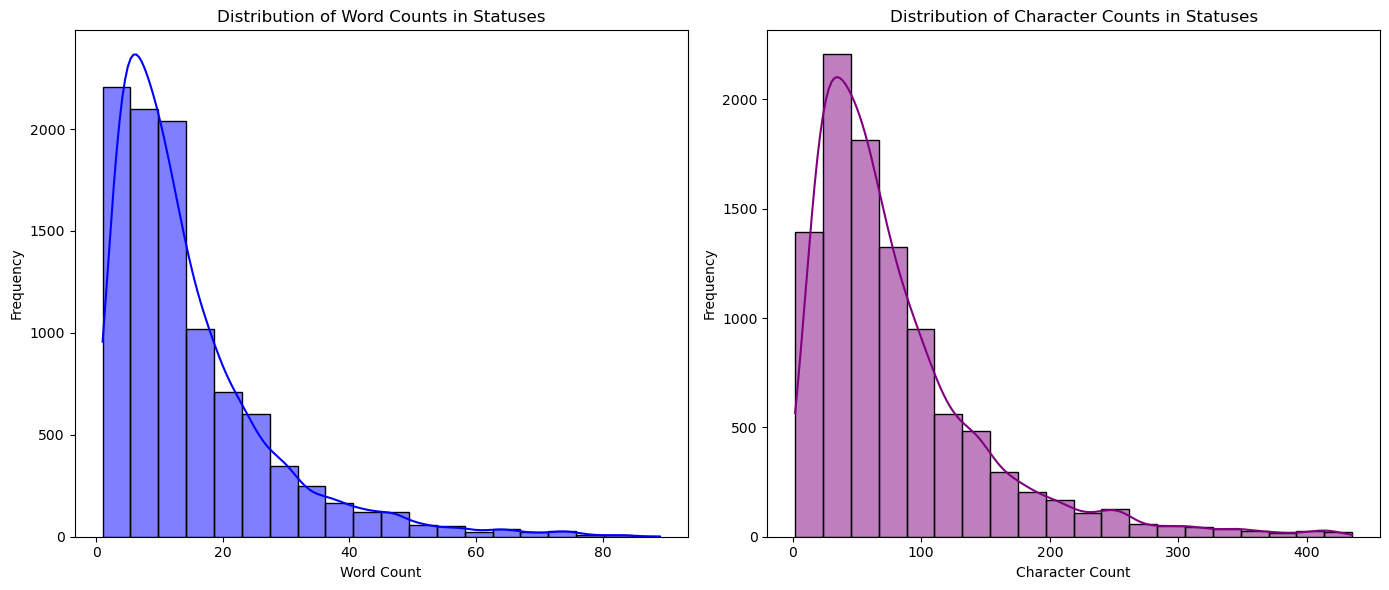

In [18]:
# Plotting the distributions
plt.figure(figsize=(14, 6))

# for word counts
plt.subplot(1, 2, 1)  # want side by side show --> (nrows, ncols, index)
sns.histplot(data['status_word_count'], bins=20, kde=True, color='blue')
plt.title('Distribution of Word Counts in Statuses')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# for character counts
plt.subplot(1, 2, 2)
sns.histplot(data['status_length'], bins=20, kde=True, color='purple')
plt.title('Distribution of Character Counts in Statuses')
plt.xlabel('Character Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# It has the heavily skew to the right (positive skewed)

In [20]:
data['cAGR'].dtypes

dtype('O')

In [22]:
# converting into numeric form
data['cAGR'] = data['cAGR'].map({'n':0, 'y':1})

In [24]:
correlation = data['status_word_count'].corr(data['cAGR'])
print(correlation)

-0.006892263556635333


**5. What is the difference between CountVectorizer and TFIDFVectorizer?**

CountVectorizer is use based on word frequency like dummying the words up across each sentences. While TFIDFVectorizer adjusts word frequency / weighting them by considering how common or rare the word in the data frame.

**6. What are stopwords?**

Stopwords are the list of the common with no / useless meaning words such as a, the, an, of, am. These are the word that are not provide a meaningful information to the analysis, that is why we need to remove them to save space, memory, increase the efficiency, and can be focus on the useful terms.


**7. Give an example of when you might remove stopwords.**

when you want to know the only meaningful words on that task and when you want to pay attention on the revelence words. This might lose the meaning or the sentiment of the sentences when wish to know about the sentiment of that sentences

**8. Give an example of when you might keep stopwords in your model.**

I think when doing the sentiment analysis we must keep the stopwords, for example "I dont like this movies", by removing the stopwords, the sentiment of the sentences will be totally changed to the opposite one.

### Step 4: Model the data.

We are going to fit two types of models: a logistic regression and a [**Naive Bayes classifier**](https://scikit-learn.org/stable/modules/naive_bayes.html).

**Reminder:** We will only use the feature `STATUS` to model `cAGR`.

### We want to attempt to fit our models on sixteen sets of features:

1. CountVectorizer with 100 features, with English stopwords removed and with an `ngram_range` that includes 1 and 2.
2. CountVectorizer with 100 features, with English stopwords removed and with the default `ngram_range`.
3. CountVectorizer with 100 features, with English stopwords kept in and with an `ngram_range` that includes 1 and 2.
4. CountVectorizer with 100 features, with English stopwords kept in and with the default `ngram_range`.
5. CountVectorizer with 500 features, with English stopwords removed and with an `ngram_range` that includes 1 and 2.
6. CountVectorizer with 500 features, with English stopwords removed and with the default `ngram_range`.
7. CountVectorizer with 500 features, with English stopwords kept in and with an `ngram_range` that includes 1 and 2.
8. CountVectorizer with 500 features, with English stopwords kept in and with the default `ngram_range`.
9. TFIDFVectorizer with 100 features, with English stopwords removed and with an `ngram_range` that includes 1 and 2.
10. TFIDFVectorizer with 100 features, with English stopwords removed and with the default `ngram_range`.
11. TFIDFVectorizer with 100 features, with English stopwords kept in and with an `ngram_range` that includes 1 and 2.
12. TFIDFVectorizer with 100 features, with English stopwords kept in and with the default `ngram_range`.
13. TFIDFVectorizer with 500 features, with English stopwords removed and with an `ngram_range` that includes 1 and 2.
14. TFIDFVectorizer with 500 features, with English stopwords removed and with the default `ngram_range`.
15. TFIDFVectorizer with 500 features, with English stopwords kept in and with an `ngram_range` that includes 1 and 2.
16. TFIDFVectorizer with 500 features, with English stopwords kept in and with the default `ngram_range`.

**9. Rather than manually instantiating 16 different vectorizers, what `sklearn` class have we learned about that might make this easier? Use it.**

we can use GridSearchCV and Pipeline to help the work to be more efficient

In [29]:
# define X and y
X = data['STATUS']
y = data['cAGR']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Define the parameter grid for the GridSearchCV
param_grid = {
    'vectorizer': [CountVectorizer(), TfidfVectorizer()],
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'vectorizer__stop_words': [None, 'english'],
    'vectorizer__max_features': [100, 500]
}

# Set up the pipeline with vectorizer and classifier
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),  
    ('classifier', LogisticRegression())  
])

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(pipeline, 
                           param_grid, 
                           cv=5, 
                           n_jobs=5)


**10. What are some of the advantages of fitting a logistic regression model?**

1. It can be use Regularization
2. Easy to interprete the coefficeint
3. Less prone to overfit with fewer features 

**11. Fit a logistic regression model and compare it to the baseline.**

In [31]:
# Fit the model to the data 
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('classifier', LogisticRegression())]),
             n_jobs=5,
             param_grid={'vectorizer': [CountVectorizer(), TfidfVectorizer()],
                         'vectorizer__max_features': [100, 500],
                         'vectorizer__ngram_range': [(1, 1), (1, 2)],
                         'vectorizer__stop_words': [None, 'english']})

In [51]:
# baseline
y.value_counts(normalize=True)

cAGR
1    0.531209
0    0.468791
Name: proportion, dtype: float64

In [63]:
# best accuracy score
print(f"Best cv score: {grid_search.best_score_}")
print(f"Train score: {grid_search.score(X_train, y_train):.2f}")
print(f"Test score: {grid_search.score(X_test, y_test):.2f}")

# tend to be overfit 

Best cv score: 0.5464490409546036
Train score: 0.62
Test score: 0.55


### Summary of Naive Bayes 

Naive Bayes is a classification technique that relies on probability to classify observations.
- It's based on a probability rule called **Bayes' Theorem**... thus, "**Bayes**."
- It makes an assumption that isn't often met, so it's "**naive**."

Despite being a model that relies on a naive assumption, it often performs pretty well! (This is kind of like linear regression... we aren't always guaranteed homoscedastic errors in linear regression, but the model might still do a good job regardless.)
- [**Interested in the details?**](https://www.cs.unb.ca/~hzhang/publications/FLAIRS04ZhangH.pdf)


The [**sklearn documentation**](https://scikit-learn.org/stable/modules/naive_bayes.html) is here, but it can be intimidating. So, to quickly summarize the Bayes and Naive parts of the model...

#### Bayes' Theorem
If you've seen Bayes' Theorem, it relates the probability of $P(A|B)$ to $P(B|A)$. (Don't worry; we won't be doing any probability calculations by hand! However, you may want to refresh your memory on conditional probability from our earlier lessons if you forget what a conditional probability is.)

$$
\begin{eqnarray*}
\text{Bayes' Theorem: } P(A|B) &=& \frac{P(B|A)P(A)}{P(B)}
\end{eqnarray*}
$$

- Let $A$ be that someone is "agreeable," like the OCEAN category.
- Let $B$ represent the words used in their Facebook post.

$$
\begin{eqnarray*}
\text{Bayes' Theorem: } P(A|B) &=& \frac{P(B|A)P(A)}{P(B)} \\
\Rightarrow P(\text{person is agreeable}|\text{words in Facebook post}) &=& \frac{P(\text{words in Facebook post}|\text{person is agreeable})P(\text{person is agreeable})}{P(\text{words in Facebook post})}
\end{eqnarray*}
$$

We want to calculate the probability that someone is agreeable **given** the words that they used in their Facebook post! (Rather than calculating this probability by hand, this is done under the hood and we can just see the results by checking `.predict_proba()`.) However, this is exactly what our model is doing. We can (a.k.a. the model can) calculate the pieces on the right-hand side of the equation to give us a probability estimate of how likely someone is to be agreeable given their Facebook post.

#### Naive Assumption

If our goal is to estimate $P(\text{person is agreeable}|\text{words in Facebook post})$, that can be quite tricky.

---

<details><summary>Bonus: if you want to understand why that's complicated, click here.</summary>
    
- The event $\text{"words in Facebook post"}$ is a complicated event to calculate.

- If a Facebook post has 100 words in it, then the event $\text{"words in Facebook post"} = \text{"word 1 is in the Facebook post" and "word 2 is in the Facebook post" and }\ldots \text{ and "word 100 is in the Facebook post"}$.

- To calculate the joint probability of all 100 words being in the Facebook post gets complicated pretty quickly. (Refer back to the probability notes on how to calculate the joint probability of two events if you want to see more.)
</details>

---

To simplify matters, we make an assumption: **we assume that all of our features are independent of one another.**

In some contexts, this assumption might be realistic!

**12. Why would this assumption not be realistic with NLP data?**

This assumption is not being realistics in NLP data becuase it consider about the words that are dependent on each other, like the emotional, sentiment analysis, and Grammar. By put and analysis the word independently, the menaing of  that words/ sentences might not be complete and cannot reflect the true meaning.

Despite this assumption not being realistic with NLP data, we still use Naive Bayes pretty frequently.
- It's a very fast modeling algorithm. (which is great especially when we have lots of features and/or lots of data!)
- It is often an excellent classifier, outperforming more complicated models.

There are three common types of Naive Bayes models: Bernoulli Naive Bayes, Multinomial Naive Bayes, and Gaussian Naive Bayes.
- How do we pick which of the three models to use? It depends on our $X$ variable.
    - Bernoulli Naive Bayes is appropriate when our features are all 0/1 variables.
        - [**Bernoulli NB Documentation**](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB)
    - Multinomial Naive Bayes is appropriate when our features are variables that take on only positive integer counts.
        - [**Multinomial NB Documentation**](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)
    - Gaussian Naive Bayes is appropriate when our features are Normally distributed variables. (Realistically, though, we kind of use Gaussian whenever neither Bernoulli nor Multinomial works.)
        - [**Gaussian NB Documentation**](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)

**13. Suppose you CountVectorized your features. Which Naive Bayes model would be most appropriate to fit? Why? Fit it.**

The most suitable model to use for CountVectorized (raw words count)  is Multinomial NB, as it suit for the decrete data , where Gaussian model is suitable with the continouse and Bernoulli is for binary information 

In [45]:
# define pipeline 
pipeline = Pipeline([
    ('vec', CountVectorizer()),
    ('nb', MultinomialNB())])

# fit model
pipeline.fit(X_train, y_train)

print("Accuracy score of CountVectorizer and MultinomialNB")
print(f"Train score: {pipeline.score(X_train, y_train):.2f}")
print(f"Test score: {pipeline.score(X_test, y_test):.2f}")

Accuracy score of CountVectorizer and MultinomialNB
Train score: 0.86
Test score: 0.61


**14. Suppose you TFIDFVectorized your features. Which Naive Bayes model would be most appropriate to fit? Why? Fit it.**

The most suitable model to use for TFIDFVectorized (raw words count) is Multinomial NB. As the score from TFIDF is not binary and non-negativity and the score have normally skewed data as the score are mostly have low or near zero and only few of them have high score (important words are few), which is not suitable for Gaussian NB at all that expected the data to have normal distribution (bell-curve shape) - include negativity.

In [47]:
# define pipeline 
pipeline = Pipeline([
    ('vec', TfidfVectorizer()),
    ('nb', MultinomialNB())])

# fit model
pipeline.fit(X_train, y_train)

print("Accuracy score of TfidfVectorizer and MultinomialNB")
print(f"Train score: {pipeline.score(X_train, y_train):.2f}")
print(f"Test score: {pipeline.score(X_test, y_test):.2f}")

Accuracy score of TfidfVectorizer and MultinomialNB
Train score: 0.84
Test score: 0.60


**15. Compare the performance of your models.**

By comparing the two model's result, both result is overfit 

**16. Even though we didn't explore the full extent of Cambridge Analytica's modeling, based on what we did here, how effective was their approach at using Facebook data to model agreeableness?**

The model is not effective to use to predict the agreeableness from the facebook posts, as it is overfit , and the testing score is just a bit better than the base line 